# 絵画の印象評価
https://chatgpt.com/c/6776c23f-d134-8004-b800-31b6b624cb67

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import functions

SURVEY_PATH = Path("data", "survey")
tsv_file_path = SURVEY_PATH / "survey_results.tsv"

IMAGE_PATH = Path("data", "image")
SURVEY_PATH = Path("data", "survey")
CSV_OUTPUT_PATH = Path("data", "csv")
CSV_FILENAME = "results.csv"

## 好感度データの読み込み

In [258]:
impression_data = functions.load_impression_data_from_tsv(tsv_file_path)
print(impression_data)

{'image_01': 3.5714285714285716, 'image_02': 6.0, 'image_03': 6.285714285714286, 'image_04': 7.285714285714286, 'image_05': 8.0, 'image_06': 5.428571428571429, 'image_07': 4.0, 'image_08': 6.142857142857143, 'image_09': 5.285714285714286, 'image_10': 3.857142857142857}


## 画像のパスを取得

In [259]:
image_paths = functions.get_image_paths(IMAGE_PATH)

## CSVファイルを生成

In [260]:
functions.write_csv_output(image_paths, impression_data, output_path=CSV_OUTPUT_PATH, filename=CSV_FILENAME)

## 散布図を描画

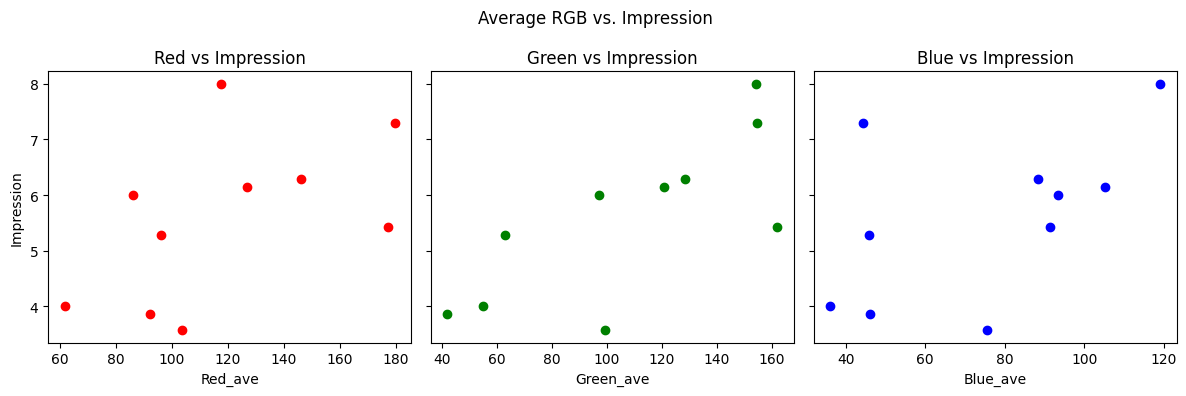

In [261]:
df = pd.read_csv(CSV_OUTPUT_PATH / CSV_FILENAME, delimiter="\t")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Average RGB vs. Impression")

# Red_ave vs Impression
axes[0].scatter(df["Red_ave"], df["Impression"], color="red")
axes[0].set_title("Red vs Impression")
axes[0].set_xlabel("Red_ave")
axes[0].set_ylabel("Impression")
# Green_ave vs Impression
axes[1].scatter(df["Green_ave"], df["Impression"], color="green")
axes[1].set_title("Green vs Impression")
axes[1].set_xlabel("Green_ave")

# Blue_ave vs Impression
axes[2].scatter(df["Blue_ave"], df["Impression"], color="blue")
axes[2].set_title("Blue vs Impression")
axes[2].set_xlabel("Blue_ave")

plt.tight_layout()
plt.show()


## 重回帰分析を行う

1. データの読み込み

In [262]:
df = pd.read_csv(CSV_OUTPUT_PATH / CSV_FILENAME, delimiter="\t")

2. 説明変数(X)と目的変数(y)の作成

In [263]:
X = df[["Red_ave", "Green_ave", "Blue_ave"]]
y = df["Impression"]

3. 学習用モデル(LinearRegression)のインスタンス生成

In [264]:
model = LinearRegression()

4. 回帰モデルに当てはめる (fit)

In [265]:
results = model.fit(X, y)

5. 回帰係数と切片を取得

In [266]:
coef = model.coef_
intercept = model.intercept_

6. 決定係数(R^2)を取得

In [267]:
r2_score = model.score(X, y)

7. 結果の出力

In [268]:
print("【回帰式】")
print(f"Impression = {intercept:.4f}"
      f" + ({coef[0]:.4f}) × Red_ave"
      f" + ({coef[1]:.4f}) × Green_ave"
      f" + ({coef[2]:.4f}) × Blue_ave")

print("【決定係数(R^2)】:", round(r2_score, 4))

【回帰式】
Impression = 3.4489 + (-0.0126) × Red_ave + (0.0352) × Green_ave + (-0.0020) × Blue_ave
【決定係数(R^2)】: 0.578


## 精度向上に向けて：標準偏差による重み付け

1. 好感度の平均・分散・weightを取得

In [269]:
variances_data = functions.load_image_variances_from_tsv(tsv_file_path,alpha=2)

In [270]:
weights = functions.extract_weights(variances_data)

In [271]:
df = pd.read_csv(CSV_OUTPUT_PATH / CSV_FILENAME, delimiter="\t")

In [272]:
X = df[["Red_ave", "Green_ave", "Blue_ave"]]
y = df["Impression"]

In [273]:
model = LinearRegression()

In [274]:
model.fit(X, y, sample_weight=weights)

LinearRegression()

In [275]:
coef = model.coef_
intercept = model.intercept_

In [276]:
r2_score = model.score(X, y)

In [277]:
print("【回帰式】")
print(f"Impression = {intercept:.4f}"
      f" + ({coef[0]:.4f}) × Red_ave"
      f" + ({coef[1]:.4f}) × Green_ave"
      f" + ({coef[2]:.4f}) × Blue_ave")

print("【決定係数(R^2)】:", round(r2_score, 4))

【回帰式】
Impression = 3.3815 + (-0.0182) × Red_ave + (0.0453) × Green_ave + (-0.0065) × Blue_ave
【決定係数(R^2)】: 0.558
